# Upload Dataset & Unzip

In [ ]:
!unzip /content/polyvore-outfits.zip

Streaming output truncated to the last 5000 lines.
  inflating: polyvore_outfits/images/90489434.jpg  
  inflating: polyvore_outfits/images/90492213.jpg  
  inflating: polyvore_outfits/images/90492494.jpg  
  inflating: polyvore_outfits/images/90496029.jpg  
  inflating: polyvore_outfits/images/90497446.jpg  
  inflating: polyvore_outfits/images/90518135.jpg  
  inflating: polyvore_outfits/images/90518552.jpg  
  inflating: polyvore_outfits/images/90521419.jpg  
  inflating: polyvore_outfits/images/90524054.jpg  
  inflating: polyvore_outfits/images/90531717.jpg  
  inflating: polyvore_outfits/images/90537718.jpg  
  inflating: polyvore_outfits/images/90539482.jpg  
  inflating: polyvore_outfits/images/90540596.jpg  
  inflating: polyvore_outfits/images/90541187.jpg  
  inflating: polyvore_outfits/images/90543355.jpg  
  inflating: polyvore_outfits/images/90543409.jpg  
  inflating: polyvore_outfits/images/90543514.jpg  
  inflating: polyvore_outfits/images/90543898.jpg  
  inflating: 

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pathlib
import os
import tqdm
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Zip Outfit Images to Drive

* For users conveninence save only outfit images from the dataset

In [ ]:
file_paths = []
for root, directories, files in os.walk('/content/polyvore_outfits/images'):
    for file_name in files:
        file_path = os.path.join(root, file_name)
        file_paths.append(file_path)

In [ ]:
len(file_paths)

261057

In [ ]:
with ZipFile('/content/drive/MyDrive/Outfit_Recommendation_Project/polyvore_outfits_images.zip', 'w') as zip:
    for file in file_paths:
        zip.write(file)

In [ ]:
!unzip "/content/drive/MyDrive/Outfit_Recommendation_Project/polyvore_outfits_images.zip"

Archive:  /content/drive/MyDrive/Outfit_Recommendation_Project/polyvore_outfits_images.zip
replace content/polyvore_outfits/images/59820376.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Preprocessing

* Storing csv converted files into a single folder for easy retrieval of data

##### polyvore_outfit_titles.json

In [ ]:
polyvore_outfit_titles_df = pd.read_json('/content/polyvore_outfits/polyvore_outfit_titles.json')
polyvore_outfit_titles_df = polyvore_outfit_titles_df.T
polyvore_outfit_titles_df

,url_name,title
219779031,spring trend colored denim,Denim Jumpers
211158670,boot scootin outfit only 2500,Stacked-Heel Boots
222049137,mermaid for life,"""Mermaid Hair, Don't Care"""
207880976,street style mini dress wrap,Blanket Wraps
171638917,high waisted jeans,High-Waisted Skinny Jeans
...,...,...
209395792,67 night guys,Apple Cider and Doughnuts
213634610,dance party,Dance Party
222597251,friday night,Friday Night
179451388,poncho in rain,Rain Ponchos


In [ ]:
polyvore_outfit_titles_df['outfit_id'] = polyvore_outfit_titles_df.index
polyvore_outfit_titles_df.reset_index(drop=True, inplace=True)

In [ ]:
polyvore_outfit_titles_df.head(10)

,url_name,title,outfit_id
0,spring trend colored denim,Denim Jumpers,219779031
1,boot scootin outfit only 2500,Stacked-Heel Boots,211158670
2,mermaid for life,"""Mermaid Hair, Don't Care""",222049137
3,street style mini dress wrap,Blanket Wraps,207880976
4,high waisted jeans,High-Waisted Skinny Jeans,171638917
5,casual statement,Chambray Dresses,81476629
6,lake studio floral stitched embroidered,Embroidered Coats,219905886
7,spring date made my friend,Friend Date,215768200
8,pack go rio,Rio,205180079
9,heres to everything,Holiday Fun Run,96522071


In [ ]:
print(f'Total number of outfits = {polyvore_outfit_titles_df.shape[0]}')

Total number of outfits = 68306


In [ ]:
polyvore_outfit_titles_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/outfit_titles.csv', index=False)

##### polyvore_item_metadata.json

In [ ]:
polyvore_item_metadata_df = pd.read_json('/content/polyvore_outfits/polyvore_item_metadata.json')
polyvore_item_metadata_df

,211990161,183179503,152771755,190445143,211444470,192704091,117334561,127403908,149817672,210309753,...,201233356,129890527,197205553,142700536,192169702,108411005,212452593,208651882,209210426,181567392
url_name,neck print chiffon plus size,christian pellizzari floral jacquard trousers,natures jewelry stainless steel not,balmain women high waist flared,acler orson high waist belted,christian louboutin girlystrappi bow 100mm,sacai luck cable knit cardigan,lapel loose woolen pink coat,dolce gabbana roll neck sweater,rhinestone devil eye box chain,...,pre-owned giuseppe zanotti suede platform,raga statement pendant necklace,belated punk zip up jacket,red faux suede polished strappy,jean skinny empi%C3%A8cement brod%C3%A9 la,arnica embellished hand painted skirt,thom browne little boy knitted,colorful vortex print shawl scarf,floral embroidered mesh see thru,shein sheinside extreme destroyed denim
description,,Gold and black silk blend floral jacquard trou...,,Decorative gold colored buttons with lion deta...,This Acler Orson High Waist Belted Short featu...,Christian Louboutin patent leather and denim s...,,Pink Plain Coats Woolen Polyester Collar Fashi...,Black cashmere roll neck sweater from Dolce &...,,...,Purple suede Giuseppe Zanotti platform sandals...,,,Make sure to add these sexy heels to your coll...,,Shop Stella Jean in our expertly curated in-se...,,,,
catgeories,,"[Women's Fashion, Clothing, Pants, Christian P...",,"[Women's Fashion, Clothing, Pants, Balmain pants]","[Women's Fashion, Clothing, Shorts, Marissa We...","[Women's Fashion, Shoes, Sandals, Christian Lo...",,"[Women's Fashion, Clothing, Outerwear, Coats]","[Women's Fashion, Tops, Sweaters, Dolce&Gabban...",,...,"[Women's Fashion, Shoes, Sandals, Giuseppe Zan...",,,"[Women's Fashion, Shoes, Pumps]",,"[Women's Fashion, Clothing, Skirts, Knee Lengt...",,,,
title,,Christian Pellizzari floral jacquard trousers,,Balmain Women High Waist Flared Knit Pants,Acler Orson High Waist Belted Short,Christian Louboutin Girlystrappi Bow 100mm Red...,,Lapel Loose Woolen Pink Coat,Dolce & Gabbana roll neck sweater,,...,Pre-owned Giuseppe Zanotti Suede Platform Sandals,,,Red Faux Suede Polished Strappy Peep Toe Heels,,Arnica Embellished Hand Painted Skirt,,,,
related,,"[Floral pants, Grey pants, Print pants, Patter...",,"[Balmain, Flared pants, High-waisted pants, Kn...","[Short shorts, High-waisted shorts, High rise ...","[Christian Louboutin, Red sole shoes, Patent l...",,"[Woolen coat, Pink coat, Fur-collar wool coats...","[Dolce&Gabbana, Long sleeve tops, Rollneck swe...",,...,"[Giuseppe Zanotti, Suede shoes, Purple shoes, ...",,,"[Platform pumps, Red pumps, Peep toe pumps, Hi...",,"[Red skirt, Embellished skirt]",,,,
category_id,15,28,65,28,29,46,18,24,19,106,...,46,62,25,43,237,9,236,105,11,25
semantic_category,tops,bottoms,jewellery,bottoms,bottoms,shoes,outerwear,outerwear,tops,jewellery,...,shoes,jewellery,outerwear,shoes,bottoms,bottoms,outerwear,scarves,tops,outerwear


In [ ]:
polyvore_item_metadata_df = polyvore_item_metadata_df.T
polyvore_item_metadata_df['item_id'] = polyvore_item_metadata_df.index
polyvore_item_metadata_df.reset_index(drop=True, inplace=True)

In [ ]:
polyvore_item_metadata_df

,url_name,description,catgeories,title,related,category_id,semantic_category,item_id
0,neck print chiffon plus size,,,,,15,tops,211990161
1,christian pellizzari floral jacquard trousers,Gold and black silk blend floral jacquard trou...,"[Women's Fashion, Clothing, Pants, Christian P...",Christian Pellizzari floral jacquard trousers,"[Floral pants, Grey pants, Print pants, Patter...",28,bottoms,183179503
2,natures jewelry stainless steel not,,,,,65,jewellery,152771755
3,balmain women high waist flared,Decorative gold colored buttons with lion deta...,"[Women's Fashion, Clothing, Pants, Balmain pants]",Balmain Women High Waist Flared Knit Pants,"[Balmain, Flared pants, High-waisted pants, Kn...",28,bottoms,190445143
4,acler orson high waist belted,This Acler Orson High Waist Belted Short featu...,"[Women's Fashion, Clothing, Shorts, Marissa We...",Acler Orson High Waist Belted Short,"[Short shorts, High-waisted shorts, High rise ...",29,bottoms,211444470
...,...,...,...,...,...,...,...,...
251003,arnica embellished hand painted skirt,Shop Stella Jean in our expertly curated in-se...,"[Women's Fashion, Clothing, Skirts, Knee Lengt...",Arnica Embellished Hand Painted Skirt,"[Red skirt, Embellished skirt]",9,bottoms,108411005
251004,thom browne little boy knitted,,,,,236,outerwear,212452593
251005,colorful vortex print shawl scarf,,,,,105,scarves,208651882
251006,floral embroidered mesh see thru,,,,,11,tops,209210426


In [ ]:
polyvore_item_metadata_df.dtypes

url_name             object
description          object
catgeories           object
title                object
related              object
category_id          object
semantic_category    object
item_id               int64
dtype: object

In [ ]:
print(f'Number of Items = {polyvore_item_metadata_df.shape[0]}')

Number of Items = 251008


In [ ]:
print(f'Number of Images = {len(os.listdir("/content/content/polyvore_outfits/images"))}')

Number of Images = 261057


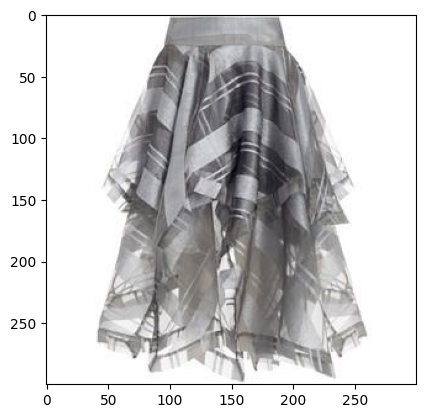

In [ ]:
img = mpimg.imread('/content/content/polyvore_outfits/images/104934947.jpg')
plt.imshow(img)

In [ ]:
polyvore_item_metadata_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/item_metadata.csv', index=False)

##### images

In [ ]:
images_path = np.array(glob.glob('/content/content/polyvore_outfits/images'+'/'+'*.jpg'))
print(len(images_path))
print(images_path)

261057
['/content/content/polyvore_outfits/images/59820376.jpg'
 '/content/content/polyvore_outfits/images/206518930.jpg'
 '/content/content/polyvore_outfits/images/159052074.jpg' ...
 '/content/content/polyvore_outfits/images/180629225.jpg'
 '/content/content/polyvore_outfits/images/193421769.jpg'
 '/content/content/polyvore_outfits/images/165781745.jpg']


In [ ]:
def get_item_id(img_path):
    item_file = os.path.basename(img_path)
    item_id = pathlib.Path(item_file).with_suffix("")
    return item_id.name

In [ ]:
item_image_df = pd.DataFrame(columns=['item_id', 'item_image_path'])
item_image_df.item_image_path = images_path
item_image_df.item_id = item_image_df.item_image_path.apply(get_item_id)
item_image_df

,item_id,item_image_path
0,59820376,/content/content/polyvore_outfits/images/59820...
1,206518930,/content/content/polyvore_outfits/images/20651...
2,159052074,/content/content/polyvore_outfits/images/15905...
3,147491841,/content/content/polyvore_outfits/images/14749...
4,207480011,/content/content/polyvore_outfits/images/20748...
...,...,...
261052,149784213,/content/content/polyvore_outfits/images/14978...
261053,124261469,/content/content/polyvore_outfits/images/12426...
261054,180629225,/content/content/polyvore_outfits/images/18062...
261055,193421769,/content/content/polyvore_outfits/images/19342...


In [ ]:
item_image_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/item_image.csv', index=False)

##### categories.csv

In [ ]:
categories_df = pd.read_csv('/content/polyvore_outfits/categories.csv', header=0, names=['category_id', 'fine_grained_category', 'semantic_category'])
categories_df

,category_id,fine_grained_category,semantic_category
0,3,dress,all-body
1,4,dress,all-body
2,5,dress,all-body
3,6,gown,all-body
4,7,skirt,bottoms
...,...,...,...
218,4495,sweathirt,tops
219,4495,sweater,tops
220,4496,hoodie,tops
221,4517,swimsuit top,tops


In [ ]:
categories_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/categories.csv', index=False)

##### Preparing Training Feature Data

In [ ]:
items_id_list = item_image_df.item_id.to_numpy()
items_id_list

array(['59820376', '206518930', '159052074', ..., '180629225',
       '193421769', '165781745'], dtype=object)

In [ ]:
images_path_list = item_image_df.item_image_path.to_numpy()
images_path_list

array(['/content/content/polyvore_outfits/images/59820376.jpg',
       '/content/content/polyvore_outfits/images/206518930.jpg',
       '/content/content/polyvore_outfits/images/159052074.jpg', ...,
       '/content/content/polyvore_outfits/images/180629225.jpg',
       '/content/content/polyvore_outfits/images/193421769.jpg',
       '/content/content/polyvore_outfits/images/165781745.jpg'],
      dtype=object)

In [ ]:
def build_outfit(row):

  dic_outfit={}
  for item_dict in row[0]:
    item_path = images_path_list[np.where(items_id_list == str(item_dict['item_id']))[0][0]]
    dic_outfit[f'{row[1]}_{item_dict["index"]}'] = item_path

  return dic_outfit


In [ ]:
def arrange_images(image_dict):
    outfits_images_id = list(image_dict.keys())
    outfits_images_path = list(image_dict.values())

    return pd.DataFrame({'outfits_images_id':outfits_images_id, 'outfits_images_path':outfits_images_path})

In [ ]:
disjiont_train_df = pd.read_json("/content/polyvore_outfits/disjoint/train.json")
disjiont_train_df

,items,set_id
0,"[{'item_id': '132621870', 'index': 1}, {'item_...",199244701
1,"[{'item_id': '162715806', 'index': 1}, {'item_...",200742384
2,"[{'item_id': '180028994', 'index': 1}, {'item_...",206955877
3,"[{'item_id': '198643069', 'index': 1}, {'item_...",220340816
4,"[{'item_id': '200139640', 'index': 1}, {'item_...",219393187
...,...,...
16990,"[{'item_id': '174197824', 'index': 1}, {'item_...",205231354
16991,"[{'item_id': '189119660', 'index': 1}, {'item_...",211884833
16992,"[{'item_id': '198170894', 'index': 1}, {'item_...",217542558
16993,"[{'item_id': '180489704', 'index': 1}, {'item_...",205613256


In [ ]:
disjiont_train_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_train_df.iloc[10,1])
disjiont_train_df.iloc[10,0]

225139325


[{'item_id': '213007746', 'index': 1},
 {'item_id': '212992927', 'index': 2},
 {'item_id': '214327110', 'index': 3},
 {'item_id': '207668984', 'index': 4},
 {'item_id': '181900351', 'index': 5},
 {'item_id': '202212715', 'index': 6}]

In [ ]:
disjiont_train_outfits_df=disjiont_train_df.copy()

for i in tqdm.tqdm(range(disjiont_train_outfits_df.shape[0])):
    disjiont_train_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_train_outfits_df.iloc[i])


100%|██████████| 16995/16995 [28:40<00:00,  9.88it/s]


In [ ]:
print(disjiont_train_outfits_df.iloc[10,1])
disjiont_train_outfits_df.iloc[10,0]

225139325


{'225139325_1': '/content/content/polyvore_outfits/images/213007746.jpg',
 '225139325_2': '/content/content/polyvore_outfits/images/212992927.jpg',
 '225139325_3': '/content/content/polyvore_outfits/images/214327110.jpg',
 '225139325_4': '/content/content/polyvore_outfits/images/207668984.jpg',
 '225139325_5': '/content/content/polyvore_outfits/images/181900351.jpg',
 '225139325_6': '/content/content/polyvore_outfits/images/202212715.jpg'}

In [ ]:
disjiont_train_outfits_df

,outfit_items,outfit_id
0,{'199244701_1': '/content/content/polyvore_out...,199244701
1,{'200742384_1': '/content/content/polyvore_out...,200742384
2,{'206955877_1': '/content/content/polyvore_out...,206955877
3,{'220340816_1': '/content/content/polyvore_out...,220340816
4,{'219393187_1': '/content/content/polyvore_out...,219393187
...,...,...
16990,{'205231354_1': '/content/content/polyvore_out...,205231354
16991,{'211884833_1': '/content/content/polyvore_out...,211884833
16992,{'217542558_1': '/content/content/polyvore_out...,217542558
16993,{'205613256_1': '/content/content/polyvore_out...,205613256


In [ ]:
disjiont_train_outfits_images = pd.DataFrame(columns=['outfits_images_id', 'outfits_images_path'])
for i in tqdm.tqdm(range(disjiont_train_outfits_df.shape[0])):
    disjiont_train_outfits_images = disjiont_train_outfits_images.append(arrange_images(disjiont_train_outfits_df.iloc[i,0]), ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-42-fd1f51264f52>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_train_outfits_images = disjiont_train_outfits_images.append(arrange_images(disjiont_train_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-42-fd1f51264f52>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_train_outfits_images = disjiont_train_outfits_images.append(arrange_images(disjiont_train_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-42-fd1f51264f52>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_train_outfits_images = disjiont_train_outfits_images.append(arrange_images(disjiont_train_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-4

In [ ]:
disjiont_train_outfits_images

,outfits_images_id,outfits_images_path
0,199244701_1,/content/content/polyvore_outfits/images/13262...
1,199244701_2,/content/content/polyvore_outfits/images/15396...
2,199244701_3,/content/content/polyvore_outfits/images/17116...
3,199244701_4,/content/content/polyvore_outfits/images/16279...
4,199244701_5,/content/content/polyvore_outfits/images/17253...
...,...,...
85930,205613256_4,/content/content/polyvore_outfits/images/17596...
85931,205613256_5,/content/content/polyvore_outfits/images/16292...
85932,205613256_6,/content/content/polyvore_outfits/images/18060...
85933,225327855_1,/content/content/polyvore_outfits/images/18038...


In [ ]:
disjiont_train_outfits_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_train_outfits.csv')

In [ ]:
disjiont_train_outfits_images.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_train_outfits_images.csv', index=False)

##### Preparing Test Feature Data

In [ ]:
disjiont_test_df= pd.read_json("/content/polyvore_outfits/disjoint/test.json")
disjiont_test_df

,items,set_id
0,"[{'item_id': '159402796', 'index': 1}, {'item_...",222049137
1,"[{'item_id': '58893791', 'index': 1}, {'item_i...",171638917
2,"[{'item_id': '147772496', 'index': 1}, {'item_...",209614451
3,"[{'item_id': '172213324', 'index': 1}, {'item_...",208805759
4,"[{'item_id': '146453731', 'index': 1}, {'item_...",181727193
...,...,...
15140,"[{'item_id': '110258509', 'index': 1}, {'item_...",130442086
15141,"[{'item_id': '159369228', 'index': 1}, {'item_...",191016735
15142,"[{'item_id': '150478161', 'index': 1}, {'item_...",179451388
15143,"[{'item_id': '32286230', 'index': 1}, {'item_i...",42911078


In [ ]:
disjiont_test_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_test_df.iloc[100,1])
disjiont_test_df.iloc[100,0]

191671357


[{'item_id': '162281351', 'index': 1},
 {'item_id': '162284763', 'index': 2},
 {'item_id': '160720385', 'index': 3},
 {'item_id': '158799041', 'index': 4},
 {'item_id': '146340382', 'index': 5}]

In [ ]:
disjiont_test_outfits_df=disjiont_test_df.copy()

for i in tqdm.tqdm(range(disjiont_test_outfits_df.shape[0])):
    disjiont_test_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_test_outfits_df.iloc[i])


100%|██████████| 15145/15145 [25:45<00:00,  9.80it/s]


In [ ]:
print(disjiont_test_outfits_df.iloc[100,1])
disjiont_test_outfits_df.iloc[100,0]

191671357


{'191671357_1': '/content/content/polyvore_outfits/images/162281351.jpg',
 '191671357_2': '/content/content/polyvore_outfits/images/162284763.jpg',
 '191671357_3': '/content/content/polyvore_outfits/images/160720385.jpg',
 '191671357_4': '/content/content/polyvore_outfits/images/158799041.jpg',
 '191671357_5': '/content/content/polyvore_outfits/images/146340382.jpg'}

In [ ]:
disjiont_test_outfits_images = pd.DataFrame(columns=['outfits_images_id', 'outfits_images_path'])
for i in tqdm.tqdm(range(disjiont_test_outfits_df.shape[0])):
    disjiont_test_outfits_images = disjiont_test_outfits_images.append(arrange_images(disjiont_test_outfits_df.iloc[i,0]), ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-50-72e83b0e234e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_test_outfits_images = disjiont_test_outfits_images.append(arrange_images(disjiont_test_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-50-72e83b0e234e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_test_outfits_images = disjiont_test_outfits_images.append(arrange_images(disjiont_test_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-50-72e83b0e234e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_test_outfits_images = disjiont_test_outfits_images.append(arrange_images(disjiont_test_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-50-72e83b0

In [ ]:
disjiont_test_outfits_images

,outfits_images_id,outfits_images_path
0,222049137_1,/content/content/polyvore_outfits/images/15940...
1,222049137_2,/content/content/polyvore_outfits/images/20081...
2,222049137_3,/content/content/polyvore_outfits/images/20888...
3,222049137_4,/content/content/polyvore_outfits/images/20889...
4,222049137_5,/content/content/polyvore_outfits/images/17683...
...,...,...
74257,42911078_7,/content/content/polyvore_outfits/images/39806...
74258,210601169_1,/content/content/polyvore_outfits/images/18912...
74259,210601169_2,/content/content/polyvore_outfits/images/18912...
74260,210601169_3,/content/content/polyvore_outfits/images/18912...


In [ ]:
disjiont_test_outfits_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_test_outfits.csv',index=False)

In [ ]:
disjiont_test_outfits_images.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_test_outfits_images.csv', index=False)

##### Preparing Validation Feature Data

In [ ]:
disjiont_valid_df= pd.read_json("/content/polyvore_outfits/disjoint/valid.json")
disjiont_valid_df


,items,set_id
0,"[{'item_id': '211863963', 'index': 1}, {'item_...",223648758
1,"[{'item_id': '194622168', 'index': 1}, {'item_...",219849644
2,"[{'item_id': '184947151', 'index': 1}, {'item_...",208264087
3,"[{'item_id': '117828723', 'index': 1}, {'item_...",135005113
4,"[{'item_id': '196507149', 'index': 1}, {'item_...",216934649
...,...,...
2995,"[{'item_id': '191365709', 'index': 1}, {'item_...",221001144
2996,"[{'item_id': '157133142', 'index': 1}, {'item_...",179889650
2997,"[{'item_id': '48410374', 'index': 1}, {'item_i...",224578373
2998,"[{'item_id': '164514051', 'index': 1}, {'item_...",198313686


In [ ]:
disjiont_valid_df.rename(columns = {'items' : 'outfit_items', 'set_id' : 'outfit_id'}, inplace = True)
print(disjiont_valid_df.iloc[1000,1])
disjiont_valid_df.iloc[1000,0]

212515017


[{'item_id': '191695202', 'index': 1},
 {'item_id': '194658747', 'index': 2},
 {'item_id': '128427174', 'index': 3},
 {'item_id': '146391713', 'index': 4},
 {'item_id': '164208844', 'index': 5}]

In [ ]:
disjiont_valid_outfits_df=disjiont_valid_df.copy()

for i in tqdm.tqdm(range(disjiont_valid_outfits_df.shape[0])):
    disjiont_valid_outfits_df.at[i,'outfit_items'] = build_outfit(disjiont_valid_outfits_df.iloc[i])

100%|██████████| 3000/3000 [06:23<00:00,  7.83it/s]


In [ ]:
print(disjiont_valid_outfits_df.iloc[1000,1])
disjiont_valid_outfits_df.iloc[1000,0]

212515017


{'212515017_1': '/content/content/polyvore_outfits/images/191695202.jpg',
 '212515017_2': '/content/content/polyvore_outfits/images/194658747.jpg',
 '212515017_3': '/content/content/polyvore_outfits/images/128427174.jpg',
 '212515017_4': '/content/content/polyvore_outfits/images/146391713.jpg',
 '212515017_5': '/content/content/polyvore_outfits/images/164208844.jpg'}

In [ ]:
disjiont_valid_outfits_images = pd.DataFrame(columns=['outfits_images_id', 'outfits_images_path'])
for i in tqdm.tqdm(range(disjiont_valid_outfits_df.shape[0])):
    disjiont_valid_outfits_images = disjiont_valid_outfits_images.append(arrange_images(disjiont_valid_outfits_df.iloc[i,0]), ignore_index=True)


Streaming output truncated to the last 5000 lines.
<ipython-input-58-1e0773987cc0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_valid_outfits_images = disjiont_valid_outfits_images.append(arrange_images(disjiont_valid_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-58-1e0773987cc0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_valid_outfits_images = disjiont_valid_outfits_images.append(arrange_images(disjiont_valid_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-58-1e0773987cc0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  disjiont_valid_outfits_images = disjiont_valid_outfits_images.append(arrange_images(disjiont_valid_outfits_df.iloc[i,0]), ignore_index=True)
<ipython-input-5

In [ ]:
disjiont_valid_outfits_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_valid_outfits.csv')

In [ ]:
disjiont_valid_outfits_images.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjiont_valid_outfits_images.csv', index=False)

##### Preparing Test Target Data

In [ ]:
with open('/content/polyvore_outfits/disjoint/compatibility_test.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_test_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_test_df

,compatibility,outfit_sample
0,1,"[222049137_1, 222049137_2, 222049137_3, 222049..."
1,1,"[171638917_1, 171638917_2, 171638917_3, 171638..."
2,1,"[209614451_1, 209614451_2, 209614451_3, 209614..."
3,1,"[208805759_1, 208805759_2, 208805759_3, 208805..."
4,1,"[181727193_1, 181727193_2, 181727193_3, 181727..."
...,...,...
30285,0,"[208697202_1, 222058995_1, 60152115_3, 9792134..."
30286,0,"[163646445_2, 154832568_2, 190013480_4, 214779..."
30287,0,"[145970783_1, 190480945_1, 212286826_4, 707638..."
30288,0,"[177747016_1, 178806147_2, 164069948_5, 209157..."


In [ ]:
compatibility_test_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjoint_compatibility_test_outfits.csv',index=False)

##### Preparing Train Target Data

In [ ]:
with open('/content/polyvore_outfits/disjoint/compatibility_train.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_train_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_train_df

,compatibility,outfit_sample
0,1,"[199244701_1, 199244701_2, 199244701_3, 199244..."
1,1,"[200742384_1, 200742384_2, 200742384_3, 200742..."
2,1,"[206955877_1, 206955877_2, 206955877_3, 206955..."
3,1,"[220340816_1, 220340816_2, 220340816_3, 220340..."
4,1,"[219393187_1, 219393187_2, 219393187_3, 219393..."
...,...,...
33985,0,"[218506324_1, 221405016_1, 206461374_3, 218864..."
33986,0,"[105184990_1, 211494606_3, 204086912_4, 220595..."
33987,0,"[66630383_1, 132553628_1, 224927539_2, 2234803..."
33988,0,"[149252664_1, 224932578_2, 205854787_3, 206523..."


In [ ]:
compatibility_train_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjoint_compatibility_train_outfits.csv',index=False)

##### Preparing Validation Target Data

In [ ]:
with open('/content/polyvore_outfits/disjoint/compatibility_valid.txt', 'r') as f:
    data = [line.split() for line in f]
    data = [(line[0] , [item for item in line[1:]]) for line in data]

compatibility_valid_df = pd.DataFrame.from_records(data, columns=['compatibility', 'outfit_sample'])

compatibility_valid_df

,compatibility,outfit_sample
0,1,"[223648758_1, 223648758_2, 223648758_3, 223648..."
1,1,"[219849644_1, 219849644_2, 219849644_3, 219849..."
2,1,"[208264087_1, 208264087_2, 208264087_3, 208264..."
3,1,"[135005113_1, 135005113_2, 135005113_3, 135005..."
4,1,"[216934649_1, 216934649_2, 216934649_3, 216934..."
...,...,...
5995,0,"[215216859_1, 206870729_2, 209124426_3, 222275..."
5996,0,"[77811896_1, 207209295_2, 185443035_4, 1622178..."
5997,0,"[214362907_1, 225321688_3, 158405253_9, 209425..."
5998,0,"[209869925_1, 204014202_3, 200907615_2, 223147..."


In [ ]:
compatibility_valid_df.to_csv('/content/drive/MyDrive/Outfit_Recommendation_Project/Data_CSV_Files/disjoint_compatibility_valid_outfits.csv',index=False)